### Step 1: Load and Preview the Country Relationships Data

In [1]:
import pyvis
import seaborn as sns
import cdlib

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns

In [3]:
# Define the file path for the country relationships CSV
file_path = "/Users/emilsafarov/Library/CloudStorage/OneDrive-Personal/CF/CF_S1/20th-century/Scraped_data/country_relationships_v3.csv"
# Load the CSV into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to inspect column names and structure
df.head()

,source,target,count
0,Albania,Cuba,1
1,Albania,United States,1
2,Australia,Russia,1
3,Australia,United Kingdom,1
4,Bahamas,Cuba,1


In [4]:
df.columns

Index(['source', 'target', 'count'], dtype='object')

### Step 2 Create a Network Object from the DataFrame

In [5]:
# Create the graph from the DataFrame using correct column names
G = nx.from_pandas_edgelist(df,
                            source="source",     # source country column
                            target="target",     # target country column
                            edge_attr="count",   # frequency of interaction
                            create_using=nx.Graph())  # undirected graph

### Step 3: Plot the Static Network Graph (Basic Check)

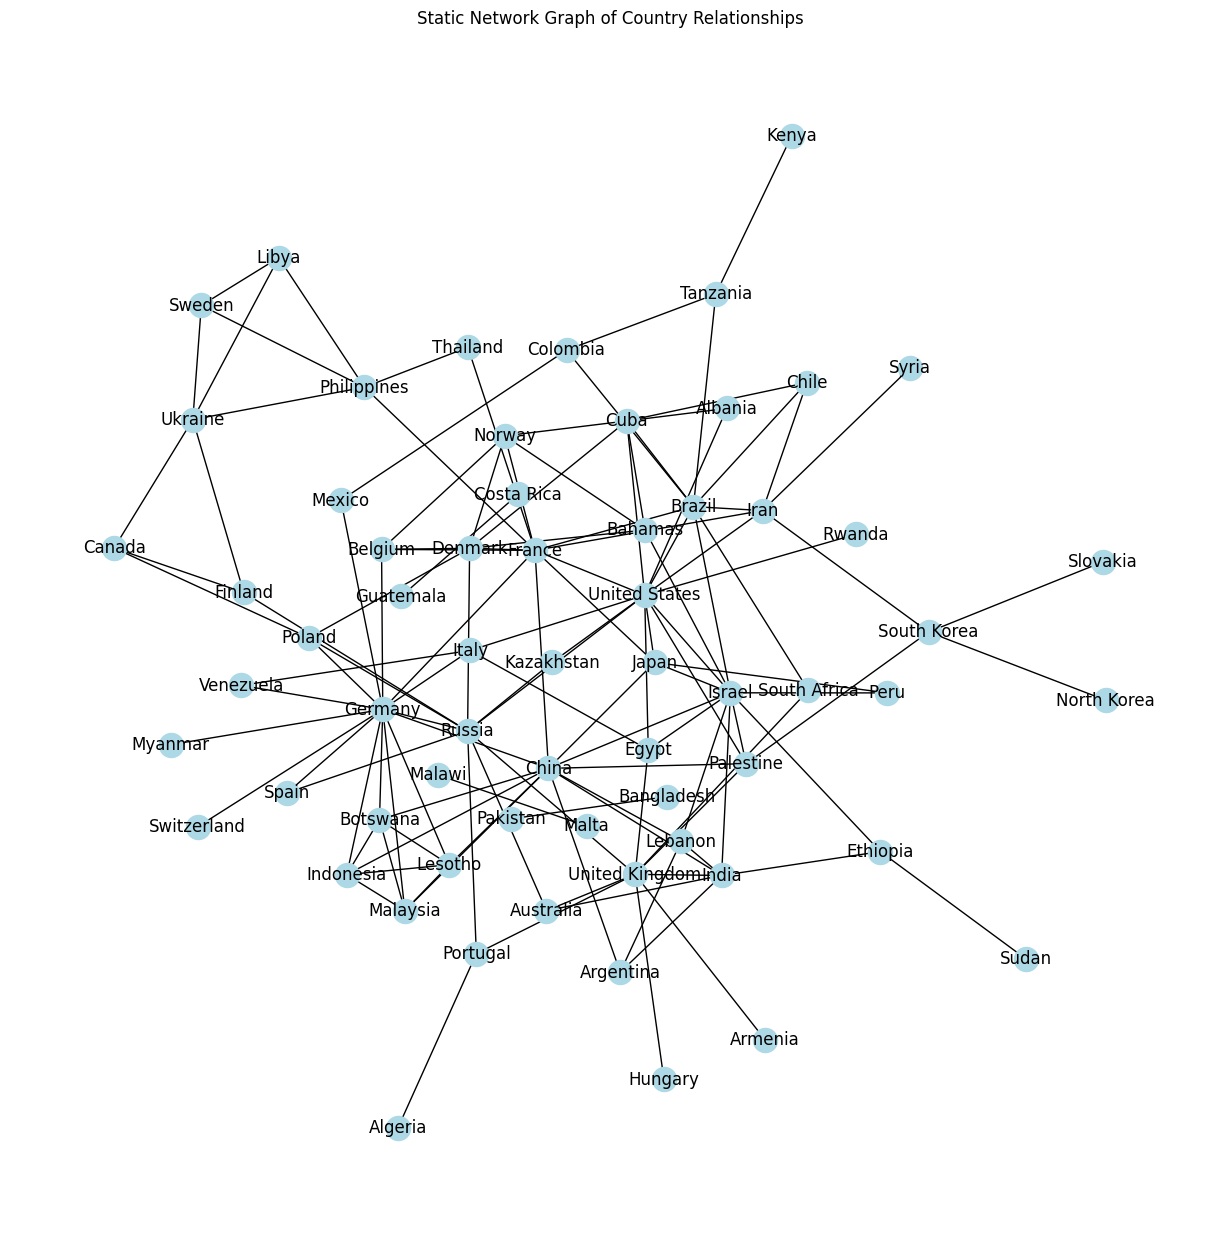

In [6]:
# Set up the plot area
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))

# Calculate node positions using Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)

# Draw the network graph with labels
nx.draw(G,
        with_labels=True,           # show country names
        node_color='lightblue',     # fill color of nodes
        edge_cmap=plt.cm.Blues,     # color map for edges (optional)
        pos=pos)

# Add a title and display the plot
plt.title("Static Network Graph of Country Relationships")
plt.show()


### Step 4: Create an Interactive Network Graph with Pyvis

In [7]:
# Create a new pyvis network object with custom size and colors
net = Network(notebook=True, width="1000px", height="800px", bgcolor="#222222", font_color="white")

# Calculate degree (number of connections) for each node
node_degree = dict(G.degree)

# Assign node sizes based on degree
nx.set_node_attributes(G, node_degree, "size")

# Convert NetworkX graph to Pyvis format
net.from_nx(G)

# Add layout and filter buttons (optional UI features)
net.show_buttons(filter_=True)

# Apply force-directed repulsion layout (prevents node overlap)
net.repulsion()

# Save and render the interactive graph in your browser
net.show("country_network.html")


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### Step 5: Community detection with Leiden algorithm.

In [8]:
# Import the Leiden community detection algorithm
from cdlib import algorithms

# Apply the Leiden algorithm to the graph
coms = algorithms.leiden(G)

# Convert the result to a node-community dictionary
new_com = coms.to_node_community_map()
dict_com = {k: v[0] for k, v in new_com.items()}

# Assign the community group label to each node
nx.set_node_attributes(G, dict_com, "group")

Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'infomap', 'wurlitzer', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


The Leiden algorithm revealed multiple country clusters. These often reflect geopolitical blocs or patterns—such as Cold War alliances, regional coalitions, or countries frequently co-mentioned in major 20th-century events.

This clustering adds depth to the network analysis by highlighting hidden structure beyond pairwise relationships. The saved interactive graph (`country_communities_leiden.html`) makes it easier to explore these patterns.

### Step 6: Visualize Detected Communities with Pyvis

In [9]:
# Create an interactive network graph with communities visualized
from pyvis.network import Network

com_net = Network(notebook=True, width="1000px", height="800px", bgcolor="#222222", font_color="white")
com_net.from_nx(G)
com_net.show_buttons(filter_=True)
com_net.repulsion()
com_net.show("country_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### Step 7: Centrality Measures

<AxesSubplot:title={'center':'Degree Centrality'}, xlabel='Country'>

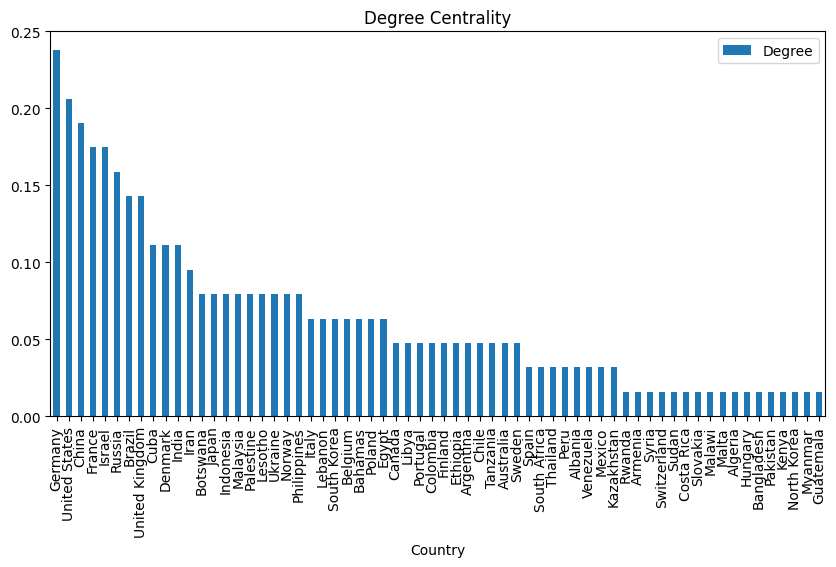

In [10]:
# ✅ Calculate degree centrality: number of connections per node
degree_dict = nx.degree_centrality(G)

# ✅ Convert to DataFrame for plotting
degree_df = pd.DataFrame(degree_dict.items(), columns=["Country", "Degree"])

# ✅ Sort and plot
degree_df.sort_values(by="Degree", ascending=False).plot(
    kind="bar", x="Country", y="Degree", figsize=(10, 5), title="Degree Centrality"
)

#### Countries with highest connections are often the most involved or central in the network.

<AxesSubplot:title={'center':'Closeness Centrality'}, xlabel='Country'>

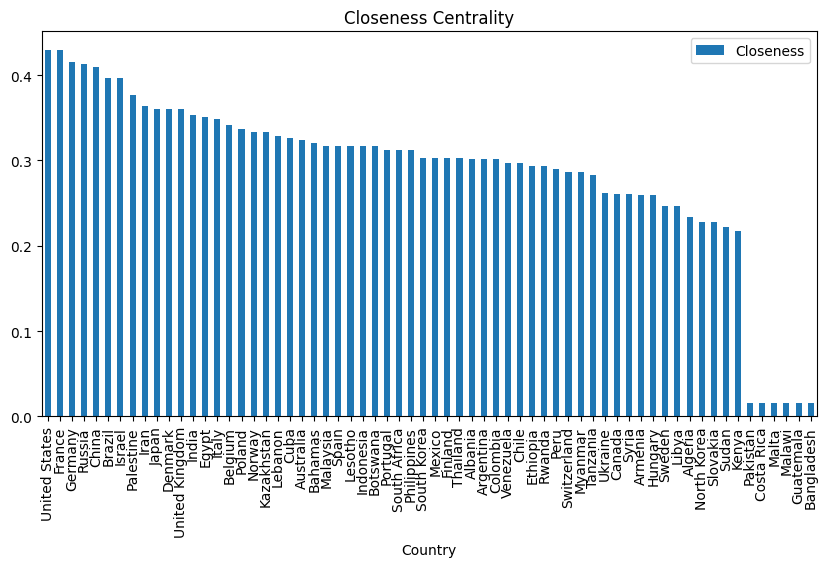

In [11]:
# Calculate closeness: how near a node is to all others
closeness_dict = nx.closeness_centrality(G)

# Convert and plot
closeness_df = pd.DataFrame(closeness_dict.items(), columns=["Country", "Closeness"])
closeness_df.sort_values(by="Closeness", ascending=False).plot(
    kind="bar", x="Country", y="Closeness", figsize=(10, 5), title="Closeness Centrality"
)

#### High closeness means better positioned to spread or access information quickly.

<AxesSubplot:title={'center':'Betweenness Centrality'}, xlabel='Country'>

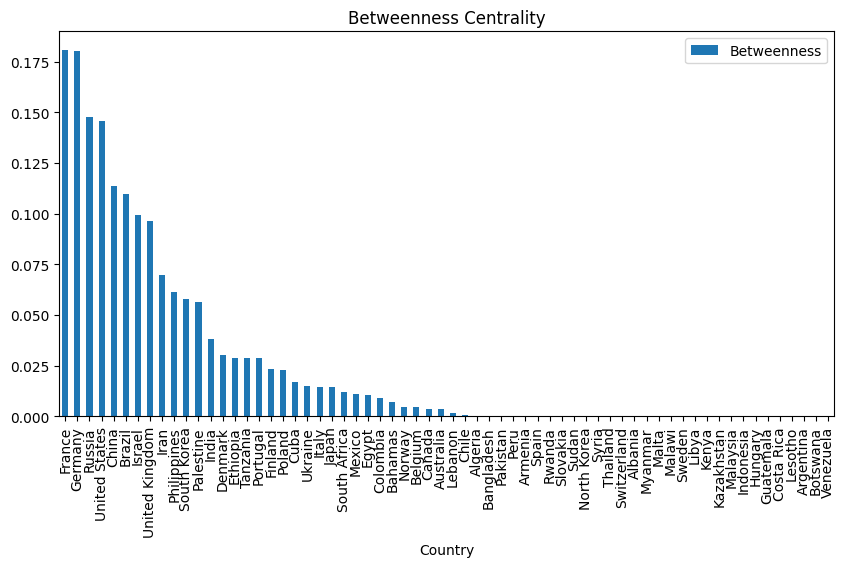

In [12]:
# ✅ Calculate betweenness: how often a node lies on shortest paths
betweenness_dict = nx.betweenness_centrality(G)

# ✅ Convert and plot
betweenness_df = pd.DataFrame(betweenness_dict.items(), columns=["Country", "Betweenness"])
betweenness_df.sort_values(by="Betweenness", ascending=False).plot(
    kind="bar", x="Country", y="Betweenness", figsize=(10, 5), title="Betweenness Centrality"
)

### Final Summary & Observations

This notebook analyzes the country relationships involved in the major 20th-century historical events using network analysis.

#### Interactive Graphs
country_network.html: Displays all country-to-country interactions. Node size reflects connection frequency.
country_communities_leiden.html: Applies the Leiden algorithm to highlight community clusters.

#### Community Detection Insight:
The Leiden algorithm uncovered distinct groups of countries. Many reflect known alliances ( like West(NATO) and East (USSR influenced), and maybe colonial ties (more historical research is needed). 

#### Centrality Measures
#### Degree Centrality:
Germany, the United States, and China were the most connected countries, showing widespread direct involvement in events.
#### Closeness Centrality:
The U.S., France, and Germany are positioned to reach all others efficiently, signaling broad access and reach across the historical event space.
#### Betweenness Centrality:
France and Germany acted as bridges between different country clusters, suggesting strategic geopolitical roles throughout the century.

Countries like Bangladesh, Guatemala, and Malta had very low centrality scores, indicating limited involvement or isolated mentions in the dataset.